## Boat Product Dataset

**Data set Link**: https://www.kaggle.com/datasets/mansithummar67/boat-product-dataset?select=TRebel.csv

**Import required libraries**

In [1]:
! pip install -q pandas wget scikit-learn nltk spacy gensim pyLDAvis wordcloud
! spacy download en_core_web_sm

# Suppress all deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from pathlib import Path
import spacy
import pandas as pd
import numpy as np
import wget
import os
import re
import string
import matplotlib.pyplot as plt
import nltk
import pyLDAvis.gensim_models
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from IPython.core.display import HTML, display, SVG
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')


     -------------------------------------- 12.8/12.8 MB 725.3 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\shali\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\shali\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Use dataset downloaded in local drive**

In [2]:
dataset = "TRebel.csv"
df = pd.read_csv(dataset)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductName      143 non-null    object
 1   ProductPrice     143 non-null    object
 2   Discount         143 non-null    object
 3   NumberofReviews  143 non-null    object
 4   Rate             143 non-null    object
 5   Review           80 non-null     object
 6   Summary          143 non-null    object
dtypes: object(7)
memory usage: 7.9+ KB


#### Text Pre-processing

Preprocessing steps done here:
- **Lower casing**: Converting all tokens to lowercase to ensure consistency.
- **Tokenization**: Splitting the text into individual words or tokens.
- **Removal of Stop Words**


In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
def text_preprocessing(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

**Clean up the raw data in the dataset by preprocessing**

In [6]:
#Printing the original Summary column
print("Summary data before pre-processing:\n")
print(df['Summary'])

# Text pre-processing of the text data fetched
df['Preprocessed_Text'] = df['Summary'].apply(text_preprocessing)

# Printing preprocessed text
print("\n\nSummary data after pre-processing:\n")
print(df['Preprocessed_Text'])

Summary data before pre-processing:

0                                     TRebel Watch Blaze
1                 Good features for the price. Decent UI
2                              Very good quality product
3      I strongly recommend everyone to buy this watc...
4      Good product, satisfied after a week of use,ba...
                             ...                        
138    This is the right one for my love \nAnd perfec...
139                                    Excellent package
140                                         Good product
141                                       Nice bluetooth
142                     fully satisfied with the product
Name: Summary, Length: 143, dtype: object


Summary data after pre-processing:

0                                 [trebel, watch, blaze]
1                    [good, features, price, decent, ui]
2                               [good, quality, product]
3      [strongly, recommend, everyone, buy, watch, be...
4      [good, product, satis

**EDA - Word Cloud**

In [7]:
# Join the tokens to form the corpus
corpus = df['Preprocessed_Text'].apply(lambda x: ' '.join(x))



C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if o

C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\shali\anaconda3\lib\site-packages\wordcloud\wordcloud.

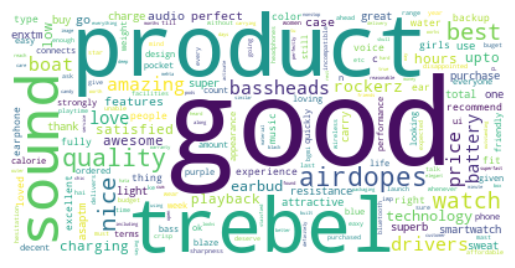

In [8]:
wordcloud_text = " ".join(summary for summary in corpus)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(wordcloud_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Using the LDA algorithm create the Topics (Min 10) for the Corpus

*A document term matrix is formed from the corpus using CountVectorizer, on which the LDA model fitting is performed.*

In [9]:
# Create a document-term matrix dtm
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(corpus)

# Initializing the LDA model
num_topics = 10  # Minimum 10 topics required
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix
lda_model.fit(dtm)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Top words related to Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Specify the number of top words to print for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
print_top_words(lda_model, feature_names, n_top_words)

Top words related to Topic #1:
nice rockerz trebel fits ears bluetooth watch good purchase like

Top words related to Topic #2:
sound watch recommend features best design performance strongly terms crisp

Top words related to Topic #3:
awesome voice perfect love right girls product battery backup rockerz

Top words related to Topic #4:
good quality sound audio love experience loved ok right thing

Top words related to Topic #5:
trebel airdopes drivers bassheads technology earbuds hours playback upto boat

Top words related to Topic #6:
amazing product watch battery smartwatch boat superb quality people love

Top words related to Topic #7:
product good best purchase sound incompatible star facilities deserve buget

Top words related to Topic #8:
price good sound super backup best low great features girls

Top words related to Topic #9:
good products best nice product battery low music price use

Top words related to Topic #10:
product satisfied excellent fully color love ordered blue pu

#### Compute the coherence score and print the topics extracted.

In [10]:
# Create a dictionary representation of the documents
dictionary = Dictionary(df['Preprocessed_Text'])
print(dictionary)

# Filter out tokens that appear in less than 3 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=3, no_above=0.5)

# Bag-of-words representation of the documents
corpus_bow = [dictionary.doc2bow(tokens) for tokens in df['Preprocessed_Text']]

# Build the LDA model
lda_model = LdaModel(corpus=corpus_bow,
                     id2word=dictionary,
                     num_topics=10,
                     random_state=42,
                     passes=10)

# Compute coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df['Preprocessed_Text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"\nCoherence Score: {coherence_score}\n")

# Print the topics extracted
print("Topics Extracted:\n")
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
    print('\n')

Dictionary<286 unique tokens: ['blaze', 'trebel', 'watch', 'decent', 'features']...>

Coherence Score: 0.4654274994943677

Topics Extracted:

(0, '0.255*"product" + 0.115*"price" + 0.115*"super" + 0.087*"color" + 0.087*"sound" + 0.059*"love" + 0.059*"purchase" + 0.059*"attractive" + 0.008*"features" + 0.005*"bassheads"')


(1, '0.150*"quality" + 0.108*"watch" + 0.078*"recommend" + 0.078*"battery" + 0.053*"buy" + 0.053*"best" + 0.053*"features" + 0.053*"light" + 0.053*"superb" + 0.053*"audio"')


(2, '0.302*"good" + 0.074*"product" + 0.072*"sound" + 0.065*"quality" + 0.030*"also" + 0.028*"airdopes" + 0.027*"love" + 0.023*"charging" + 0.023*"boat" + 0.023*"trebel"')


(3, '0.170*"product" + 0.169*"best" + 0.128*"good" + 0.082*"sound" + 0.073*"low" + 0.053*"use" + 0.053*"perfect" + 0.051*"satisfied" + 0.041*"price" + 0.028*"light"')


(4, '0.209*"good" + 0.129*"thing" + 0.121*"features" + 0.088*"price" + 0.084*"one" + 0.046*"love" + 0.046*"perfect" + 0.046*"girls" + 0.005*"trebel" + 0.005

#### Visualize the topics

In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_bow, dictionary)
pyLDAvis.display(vis)

#### Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence.

There is some problem getting the arrows in the plot displayed in Jupyter with displacy. We can provide pdf proof of the plot, if required.

In [12]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Filter sentences with at least 10 words
long_sentences = [sent for sent in df['Summary'] if len(word_tokenize(sent)) >= 10]

# Select two random sentences
random_sentences = np.random.choice(long_sentences, 2, replace=False)

i = 0
# Plot dependency parser
for sentence in random_sentences:
    doc = nlp(str(sentence))
    print("\nSentence:\n",doc)
    svg = spacy.displacy.render(doc, style='dep', jupyter=False,page= True, options={'distance': 140,'compact': False,
    'bg': '#ffffff',
    'color': '#000000',
    'font': 'Arial',
    'fontsize': 14,
    'arrow_stroke': 2,
    'arrow_width': 8})
    file_name = f"sentence{i}.svg"
    i+=1
    output_path = Path("./" + file_name)
    output_path.open("w", encoding="utf-8").write(svg)
    display(HTML(file_name))



Sentence:
 I strongly recommend everyone to buy this watch. Best watch in terms of performance, design and features.



Sentence:
 One of the best products at low price, given its good amount of bass n sharpness it delivers in music, good for Bgmi too. Budget buy in mind, go ahead without hesitation you will not be disappointed.
